### First, let's install the required libraries

In [1]:
import pandas as pd # To be able to handle the data with ease (by employing dataframe structure)
import numpy as np # To be able to treat the data as vectors

from matplotlib import pyplot as plt #To visualize the data
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering # To be able to apply agglomerative clustering modeling 
from sklearn.datasets.samples_generator import make_blobs #To generate a random dataset

### In this example, we're going to create our own random data by making use of make_blobs function
#### make_blobs function gets 3 different inputs to define the data.
#### n_samples: The total number of data points equally divided among the clusters.
#### centers: The number of centers to generate. Takes an array of [x,y] coordinates.
#### cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters.

In [3]:
x, y = make_blobs(n_samples = 60, centers = [[6,4], [-3,-4], [-1,0], [1,2], [3,4]], cluster_std=0.8)

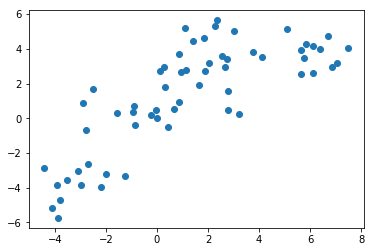

In [4]:
plt.scatter(x[:, 0], x[:, 1], marker='o') 

### Modeling

#### The Agglomerative Clustering class requires two inputs:
#### n_clusters: # of clusters to be formed
#### linkage: The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#### {“ward”, “complete”, “average”, “single”}, default=”ward”

In [5]:
aggClus = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')

In [6]:
aggClus.fit(x,y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=5, pooling_func='deprecated')

### Plotting

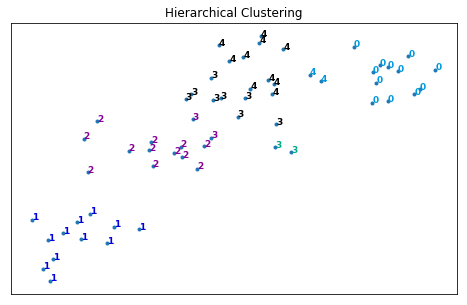

In [8]:
# Create a figure of size 8 inches by 5 inches.
plt.figure(figsize=(8,5))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of x.
x_min, x_max = np.min(x, axis=0), np.max(x, axis=0)

# Get the average distance for x.
x = (x - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(x.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(x[i, 0], x[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(aggClus.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
plt.title("Hierarchical Clustering")
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(x[:, 0], x[:, 1], marker='.')
# Display the plot
plt.show()